# The Battle of the Neighborhoods (Week 2)

Let us first import and install all necessary packages for the Cleveland v. Cincinnati Analysis.

In [121]:
import pandas as pd
import numpy as np
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

Before getting real complicated with the Foursquare API, let's start small with the sports teams. We begin by saving the urls of the websites with the necessary data for the project.

## Sports (Bengals v. Browns, Tribe v. Reds) 

In [2]:
url1 = "https://www.pro-football-reference.com/teams/cin/head-to-head.htm"
url2 = "https://www.pro-football-reference.com/teams/cle/head-to-head.htm"
url3 = "https://en.wikipedia.org/wiki/List_of_all-time_Major_League_Baseball_win%E2%80%93loss_records"

In [3]:
Bengals_df = pd.read_html(url1)
Browns_df = pd.read_html(url2)
Baseball_df = pd.read_html(url3)

In [4]:
Bengals_df = Bengals_df[0]
Browns_df = Browns_df[0]
Baseball_df = Baseball_df[1]

The data has been analyzed and does not have to be cleaned (yet), which is a big plus.

Let's see how the Bengals and Browns have performed (1) against each other and (2) against the rest of the league

In [12]:
cin_wins_v_cle = int(Bengals_df.loc[6, "Unnamed: 2_level_0"]) 
cin_losses_v_cle = int(Bengals_df.loc[6, "Unnamed: 3_level_0"])

In [13]:
cin_wins = int(Bengals_df["Unnamed: 2_level_0"].sum(axis=0))
cin_losses = int(Bengals_df["Unnamed: 3_level_0"].sum(axis=0))
cle_wins = int(Browns_df["Unnamed: 2_level_0"].sum(axis=0))
cle_losses = int(Browns_df["Unnamed: 3_level_0"].sum(axis=0))

Against each other:

In [15]:
Bengals_pct_eo = cin_wins_v_cle/(cin_wins_v_cle+cin_losses_v_cle)
Browns_pct_eo = 1 - Bengals_pct_eo
print("The Bengals have won", Bengals_pct_eo, "% of the games against the Browns, meaning that the Browns have won", Browns_pct_eo, "% of the games against the Bengals.")

The Bengals have won 0.5483870967741935 % of the games against the Browns, meaning that the Browns have won 0.4516129032258065 % of the games against the Bengals.


Against the rest of the league:

In [16]:
Bengals_pct = cin_wins/(cin_wins+cin_losses)
Browns_pct = cle_wins/(cle_wins+cle_losses)
print("The Bengals have won", Bengals_pct, "% of their games, and the Browns have won", Browns_pct, "% of their games.")

The Bengals have won 0.44875 % of their games, and the Browns have won 0.5087719298245614 % of their games.


Interesting... it seems like we've reached a bit of a stalemate, because the Bengals have been better against the Browns but the Browns have been better overall. Let's look at this a bit more closely, because... haven't the teams been pretty bad recently?

In [74]:
url4="https://www.pro-football-reference.com/teams/cle/index.htm"
url5="https://www.pro-football-reference.com/teams/cin/index.htm"

In [75]:
Browns_bs = pd.read_html(url4)
Bengals_bs = pd.read_html(url5)

In [76]:
Browns_bs = Browns_bs[0]
Bengals_bs = Bengals_bs[0]

In [77]:
Bengals_bs.drop([30], axis=0, inplace=True)
Bengals_bs.drop([31], axis=0, inplace=True)

In [78]:
Bengals_bs.drop(['Def Rank', 'Off Rank', 'Overall Rank', 'Points', 'Simple Rating System', 'Top Players', 'Unnamed: 11_level_0', 'Unnamed: 1_level_0', 'Unnamed: 2_level_0', 'Unnamed: 4_level_0', 'Unnamed: 5_level_0', 'Unnamed: 6_level_0', 'Unnamed: 7_level_0'], axis=1, inplace = True)

In [79]:
Bengals_bs = Bengals_bs.apply(pd.to_numeric)

In [80]:
Browns_bs.drop([30], axis=0, inplace=True)
Browns_bs.drop([31], axis=0, inplace=True)
Browns_bs.drop([63], axis=0, inplace=True)
Browns_bs.drop([62], axis=0, inplace=True)

In [81]:
Browns_bs.drop(['Def Rank', 'Off Rank', 'Overall Rank', 'Points', 'Simple Rating System', 'Top Players', 'Unnamed: 11_level_0', 'Unnamed: 1_level_0', 'Unnamed: 2_level_0', 'Unnamed: 4_level_0', 'Unnamed: 5_level_0', 'Unnamed: 6_level_0', 'Unnamed: 7_level_0'], axis=1, inplace = True)

In [82]:
Browns_bs = Browns_bs.apply(pd.to_numeric)

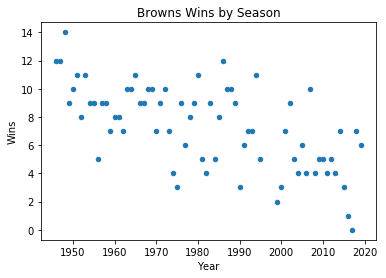

In [83]:
Browns_bs.plot(kind = 'scatter', x="Unnamed: 0_level_0", y="Unnamed: 3_level_0")
plt.title("Browns Wins by Season")
plt.xlabel("Year")
plt.ylabel("Wins")
plt.show()

Or... with a trendline...

ValueError: Input passed into argument "'y1'"is not 1-dimensional.

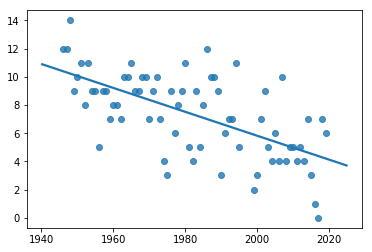

In [88]:
sns.regplot(x="Unnamed: 0_level_0", y="Unnamed: 3_level_0", data = Browns_bs)

The Bengals, on the other hand...

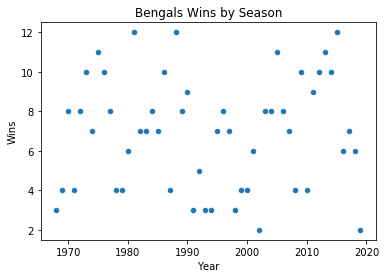

In [90]:
Bengals_bs.plot(kind = 'scatter', x="Unnamed: 0_level_0", y="Unnamed: 3_level_0")
plt.title("Bengals Wins by Season")
plt.xlabel("Year")
plt.ylabel("Wins")
plt.show()

ValueError: Input passed into argument "'y1'"is not 1-dimensional.

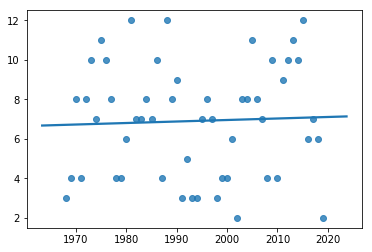

In [91]:
sns.regplot(x="Unnamed: 0_level_0", y="Unnamed: 3_level_0", data = Bengals_bs)

Let's do a little analysis of those trendlines while we're at it.

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
LR_Browns = LinearRegression()
LR_Bengals = LinearRegression()

Quick Analysis of the Browns trendline:

In [105]:
LR_Browns.fit(Browns_bs["Unnamed: 0_level_0"], Browns_bs["Unnamed: 3_level_0"])
print("The R^2 value is", LR_Browns.score(Browns_bs["Unnamed: 0_level_0"], Browns_bs["Unnamed: 3_level_0"]))
print("The slope is", LR_Browns.coef_)

The R^2 value is 0.39297803876717985
The slope is [[-0.08483143]]


Quick Analysis of the Bengals trendline:

In [107]:
LR_Bengals.fit(Bengals_bs["Unnamed: 0_level_0"], Bengals_bs["Unnamed: 3_level_0"])
print("The R^2 value is", LR_Bengals.score(Bengals_bs["Unnamed: 0_level_0"], Bengals_bs["Unnamed: 3_level_0"]))
print("The slope is", LR_Bengals.coef_)

The R^2 value is 0.0016578060800986891
The slope is [[0.00764108]]


Though the trendlines are weak, they show one thing that's definitive: the Browns won a majority of their games in their earliest days (as evidenced by the negatively-sloped trendline) while the Bengals haven't had a purely great or horrible run during their history. I will leave it up to the reader to determine which team/city deserves the crown on this one, as there are arguments that support both sides. If you'd like to include NFL Championships, the Browns are runaway winners, but all that matters in the modern era is Super Bowls.

So... yes. This means that after all of that analysis, we're still at square one. Neither Cleveland or Cincinnati has pulled ahead as a result of their respective football teams.

On to baseball! We start by analyzing the reds' and tribe's success against each other and against the rest of the league.

In [98]:
# From http://mcubed.net/mlb/cle/cin.shtml
reds_wins_v_cle = 50
tribe_wins_v_cin = 63
total_games = reds_wins_v_cle + tribe_wins_v_cin

In [109]:
tribe_pct_eo = tribe_wins_v_cin/total_games
reds_pct_eo = 1-tribe_pct_eo
print("The Indians have won", tribe_pct_eo, "% of their games against the Reds, meaning that the Reds have won", reds_pct_eo, "% of their games against the Indians.")

The Indians have won 0.5575221238938053 % of their games against the Reds, meaning that the Reds have won 0.4424778761061947 % of their games against the Indians.


Given that baseball is considered to be "America's past time," there is a much greater respect for the past within the sport, meaning that an analysis of a team's wins over time is irrelevant. Football is a game with much more of a recency bias (i.e. Why are the 1920's Yankees stil praised while NFL Championships don't mean anything?), so there is no reason to conduct the same historical analysis as we did with football.

In [113]:
print("All time, the Cleveland Indians have won", float(Baseball_df.loc[6,"Pct."])*100, "% of their games, while the Cincinnati Reds have won", float(Baseball_df.loc[8,"Pct."])*100, "% of their games.")
print("Though the Reds aren't bad, the Indians have the edge in the first two categories we've looked at. All the Reds have to fall back on is their 5 World Championships, which")
print("is greater than the Indians 2 championships. Just like with football, it seems like the we've run into a stalemate.")

All time, the Cleveland Indians have won 51.1 % of their games, while the Cincinnati Reds have won 50.5 % of their games.
Though the Reds aren't bad, the Indians have the edge in the first two categories we've looked at. All the Reds have to fall back on is their 5 World Championships, which
is greater than the Indians 2 championships. Just like with football, it seems like the we've run into a stalemate.


We will have to move in an entirely different direction to attempt to settle this debate.

## Venues in Cincinnati and Cleveland 

Here's where we move to the fun stuff. We begin by inserting our Foursquare credentials and logging the geographical coordinates of Cincinnati and Cleveland.

In [115]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                       

In [116]:
CLIENT_ID = 'BK4NND4MHUBF2F235UHKZNM44CW0LSEPNKBM1KIOIWZ2HIOV' # your Foursquare ID
CLIENT_SECRET = 'H5XCIPPDWD44XZIB4WMD5LBRTLQXEGJ0KQABKBPBWIKPO4I3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [117]:
lat_cin = 39.103119
lon_cin = -84.512016

lat_cle = 41.505493
lon_cle = -81.681290

Now to make sure we have the right coordinates, let's pull up a map of each.

In [122]:
folium.Map(location=[lat_cin, lon_cin], zoom_start=10)

In [123]:
folium.Map(location=[lat_cle, lon_cle], zoom_start=10)

Looks good to me! Now we can get into it.

In [120]:
import json
import requests

In [124]:
LIMIT = 1000
radius = 2500

url_cin = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat_cin, lon_cin, VERSION,radius,LIMIT)
url_cle = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat_cle, lon_cle, VERSION,radius,LIMIT)

In [125]:
cin_res = requests.get(url_cin).json()

In [126]:
cle_res = requests.get(url_cle).json()

We now have a massive dictionary of venues in both cleveland and cincinnati. Let's retrieve the necessary columns and convert it into a pandas dataframe.

In [127]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [129]:
from pandas.io.json import json_normalize

In [130]:
cin_venues = cin_res['response']['groups'][0]['items']
    
cin_nearby_venues = json_normalize(cin_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
cin_nearby_venues =cin_nearby_venues.loc[:, filtered_columns]

# filter the category for each row
cin_nearby_venues['venue.categories'] = cin_nearby_venues.apply(get_category_type, axis=1)

# clean columns
cin_nearby_venues.columns = [col.split(".")[-1] for col in cin_nearby_venues.columns]

Now do the same for cleveland.

In [131]:
cle_venues = cle_res['response']['groups'][0]['items']
    
cle_nearby_venues = json_normalize(cle_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
cle_nearby_venues =cle_nearby_venues.loc[:, filtered_columns]

# filter the category for each row
cle_nearby_venues['venue.categories'] = cle_nearby_venues.apply(get_category_type, axis=1)

# clean columns
cle_nearby_venues.columns = [col.split(".")[-1] for col in cle_nearby_venues.columns]

Let's check the format of these dataframes we've created.

In [132]:
cin_nearby_venues.head()

,name,categories,lat,lng
0,Sotto,Italian Restaurant,39.102797,-84.511263
1,21c Museum Hotels - Cincinnati,Hotel,39.103165,-84.512087
2,Aronoff Center for the Arts,Performing Arts Venue,39.103560,-84.511932
3,Boca,Restaurant,39.102785,-84.511302
4,Jeff Ruby's Steakhouse,Steakhouse,39.103869,-84.511959


In [134]:
cle_nearby_venues.head()

,name,categories,lat,lng
0,State Theatre,Theater,41.502376,-81.680608
1,Masthead Brewing Co,Brewery,41.504084,-81.685425
2,Ohio Theatre,Performing Arts Venue,41.502248,-81.681037
3,Danny's Deli,Deli / Bodega,41.507199,-81.683027
4,PlayhouseSquare,Performing Arts Venue,41.500896,-81.681869


Let's get a dataframe that counts the number of each category within the city.

In [138]:
cin_count = cin_nearby_venues.groupby("categories").count()
cin_count

,name,lat,lng
categories,,,
American Restaurant,5,5,5
Art Gallery,1,1,1
Art Museum,2,2,2
BBQ Joint,1,1,1
Bakery,2,2,2
Bar,6,6,6
Baseball Stadium,1,1,1
Beer Bar,1,1,1
Beer Garden,1,1,1


In [139]:
cle_count = cle_nearby_venues.groupby("categories").count()
cle_count

,name,lat,lng
categories,,,
Airport,1,1,1
American Restaurant,4,4,4
BBQ Joint,2,2,2
Bakery,2,2,2
Baseball Stadium,1,1,1
Basketball Stadium,1,1,1
Bavarian Restaurant,1,1,1
Brewery,3,3,3
Burger Joint,2,2,2


Let's see how many unique types of venues there are in Cleveland and Cincinnati.

In [142]:
cin_count = cin_count.reset_index()
print("There are", len(cin_count["categories"].unique()), "unique types of venues in downtown Cincinnati.")

There are 57 unique types of venues in downtown Cincinnati.


In [143]:
cle_count = cle_count.reset_index()
print("There are", len(cle_count["categories"].unique()), "unique types of venues in downtown Cleveland.")

There are 60 unique types of venues in downtown Cleveland.


Though it's close, it appears that one can have a more diverse experience in the city of Cleveland.